In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import random
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import warnings

In [2]:
import os
Tess = r"C:\Users\DELL\OneDrive\Desktop\speech_project\TESS Toronto emotional speech set data"
print(os.listdir(Tess))  # This should print a list of subdirectories


['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'TESS Toronto emotional speech set data', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']


In [3]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    dir_path = os.path.join(Tess, dir)  # Correct path joining
    if not os.path.isdir(dir_path):  # Skip if it's not a directory
        continue

    directories = os.listdir(dir_path)
    for file in directories:
        if not file.endswith('.wav'):  # Ensure it's a WAV file
            continue

        parts = file.split('.')[0].split('_')  # Split filename before '.wav'
        
        if len(parts) < 3:  # Check if the split list has enough elements
            print(f"Skipping file: {file} (unexpected format)")
            continue
        
        emotion_label = parts[2]  # Extract emotion
        if emotion_label == 'ps':
            emotion_label = 'surprise'
        
        file_emotion.append(emotion_label)
        file_path.append(os.path.join(dir_path, file))  # Use os.path.join for proper path formatting

# Create DataFrames
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Merge both DataFrames
final_df = pd.concat([emotion_df, path_df], axis=1)

# Display DataFrame
print(final_df.head())


  Emotions                                               Path
0    angry  C:\Users\DELL\OneDrive\Desktop\speech_project\...
1    angry  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2    angry  C:\Users\DELL\OneDrive\Desktop\speech_project\...
3    angry  C:\Users\DELL\OneDrive\Desktop\speech_project\...
4    angry  C:\Users\DELL\OneDrive\Desktop\speech_project\...


In [4]:
# Joining them both
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head(2800)

Emotions                                               Path
0       angry  C:\Users\DELL\OneDrive\Desktop\speech_project\...
1       angry  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2       angry  C:\Users\DELL\OneDrive\Desktop\speech_project\...
3       angry  C:\Users\DELL\OneDrive\Desktop\speech_project\...
4       angry  C:\Users\DELL\OneDrive\Desktop\speech_project\...
...       ...                                                ...
2795      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2796      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2797      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2798      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2799      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...

[2800 rows x 2 columns]

<Axes: xlabel='Emotions', ylabel='count'>

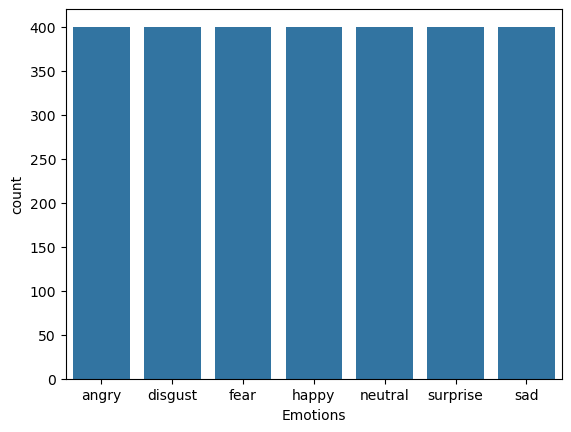

In [5]:
sns.countplot(data=Tess_df, x='Emotions')

In [6]:
import os

Ravdess = r"C:\Users\DELL\OneDrive\Desktop\speech_project\archive (9)"
print(os.listdir(Ravdess))  # Should print a list of actor directories like ['Actor_01', 'Actor_02', ..., 'Actor_24']


['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24', 'audio_speech_actors_01-24']


In [7]:
ravdess_directory_list = os.listdir(Ravdess)  # Ravdess path is defined correctly

file_emotion = []
file_path = []

for dir in ravdess_directory_list:
    actor_path = os.path.join(Ravdess, dir)  # Correct path joining
    if not os.path.isdir(actor_path):  # Ensure it's a directory
        continue
    actor_files = os.listdir(actor_path)
    
    for file in actor_files:
        part = file.split('.')[0].split('-')
        if len(part) > 2:
            file_emotion.append(int(part[2]))  # Extract emotion label
            file_path.append(os.path.join(actor_path, file))  # Correct file path

# Create DataFrames
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])


In [8]:
# Joining them both
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head(1440)

Emotions                                               Path
0      neutral  C:\Users\DELL\OneDrive\Desktop\speech_project\...
1      neutral  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2      neutral  C:\Users\DELL\OneDrive\Desktop\speech_project\...
3      neutral  C:\Users\DELL\OneDrive\Desktop\speech_project\...
4         calm  C:\Users\DELL\OneDrive\Desktop\speech_project\...
...        ...                                                ...
1435  surprise  C:\Users\DELL\OneDrive\Desktop\speech_project\...
1436  surprise  C:\Users\DELL\OneDrive\Desktop\speech_project\...
1437  surprise  C:\Users\DELL\OneDrive\Desktop\speech_project\...
1438  surprise  C:\Users\DELL\OneDrive\Desktop\speech_project\...
1439  surprise  C:\Users\DELL\OneDrive\Desktop\speech_project\...

[1440 rows x 2 columns]

<Axes: xlabel='Emotions', ylabel='count'>

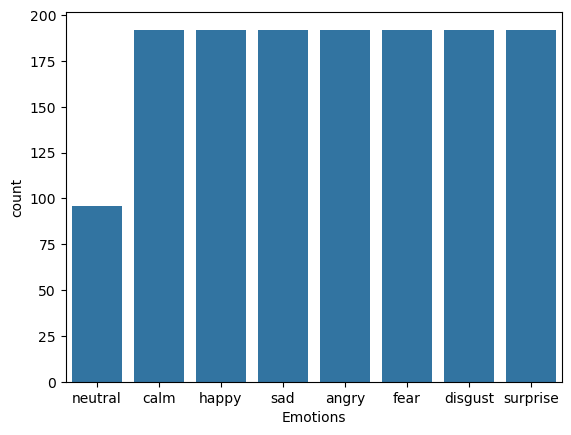

In [9]:
sns.countplot(data=Ravdess_df, x='Emotions')

In [10]:
# combining all the  datasets
data_path = pd.concat([Ravdess_df,Tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.shape

(4240, 2)

In [11]:
data_path.head(4240)

Emotions                                               Path
0     neutral  C:\Users\DELL\OneDrive\Desktop\speech_project\...
1     neutral  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2     neutral  C:\Users\DELL\OneDrive\Desktop\speech_project\...
3     neutral  C:\Users\DELL\OneDrive\Desktop\speech_project\...
4        calm  C:\Users\DELL\OneDrive\Desktop\speech_project\...
...       ...                                                ...
2795      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2796      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2797      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2798      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2799      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...

[4240 rows x 2 columns]

<Axes: xlabel='Emotions', ylabel='count'>

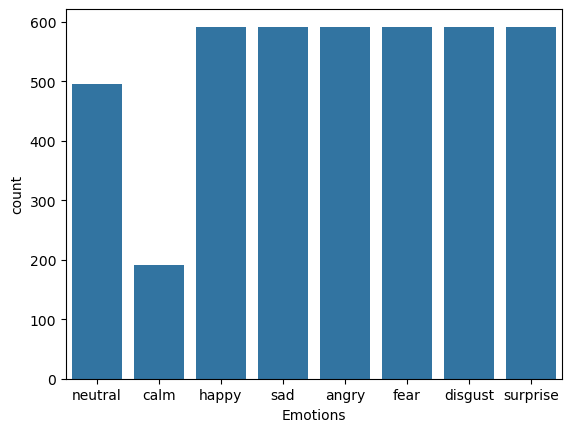

In [12]:
sns.countplot(data=data_path, x='Emotions')

In [13]:
data_path['Emotions'].value_counts()

happy       592
sad         592
angry       592
fear        592
disgust     592
surprise    592
neutral     496
calm        192
Name: Emotions, dtype: int64

In [14]:
## 8 unique emotions in combined dataset
unique_emotions = data_path['Emotions'].unique()
print(f"Number of unique emotions : {len(unique_emotions)}")
print(unique_emotions)

Number of unique emotions : 8
['neutral' 'calm' 'happy' 'sad' 'angry' 'fear' 'disgust' 'surprise']


In [15]:
#Exploring the Dataset

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

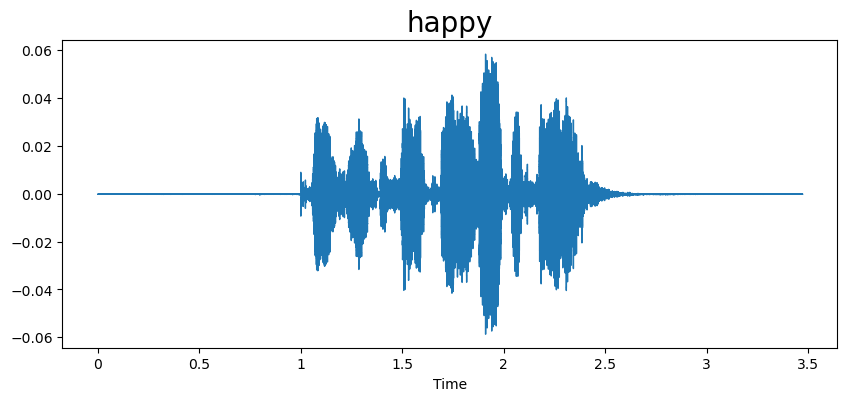

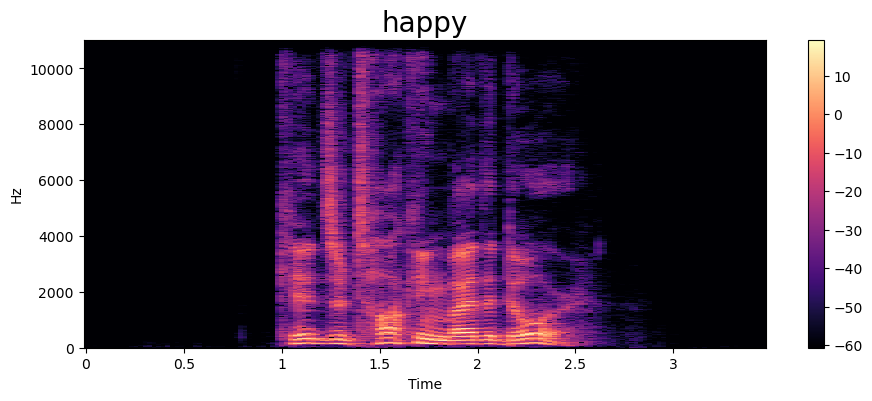

In [16]:
emotion = 'happy'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

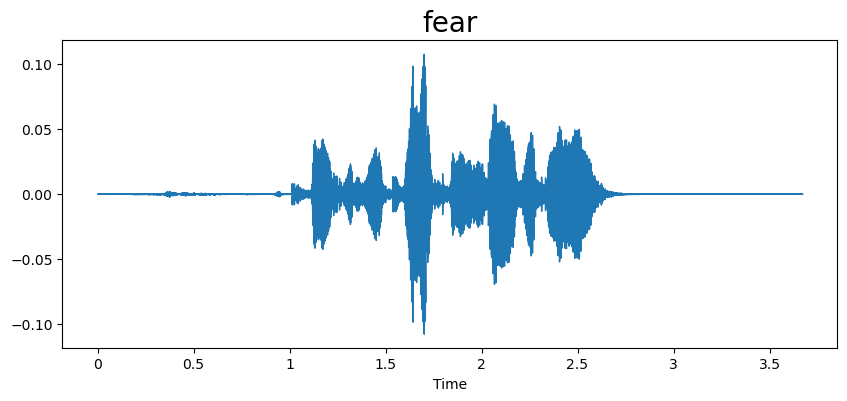

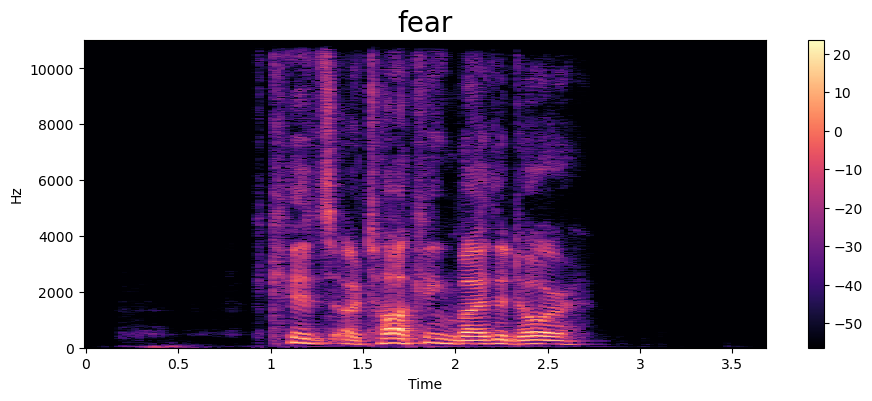

In [17]:
emotion = 'fear'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

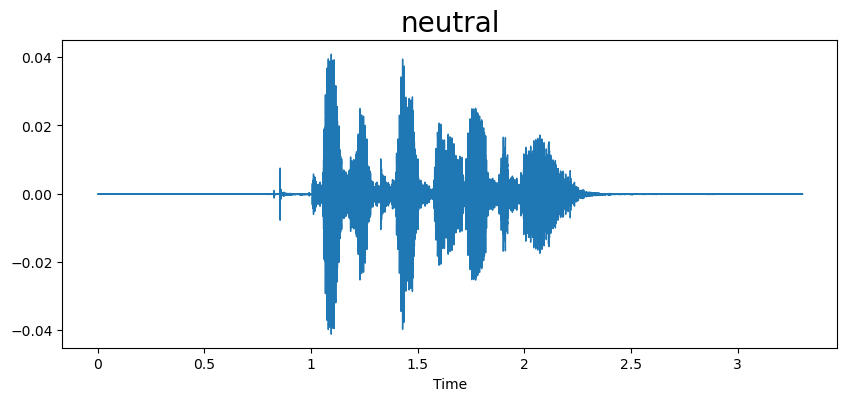

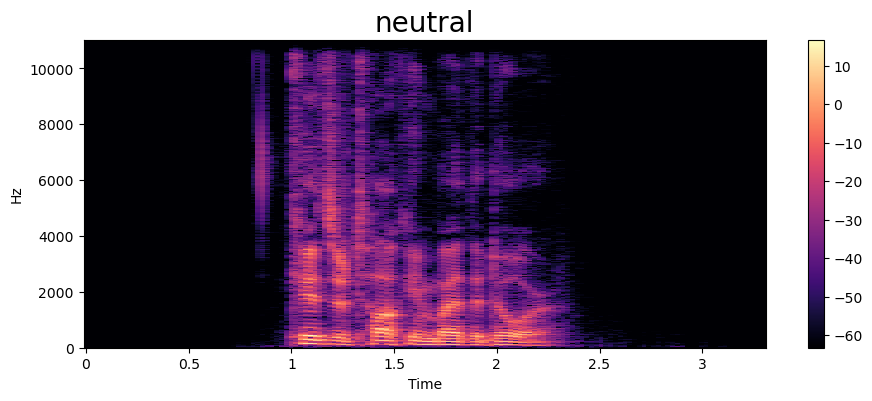

In [18]:
emotion = 'neutral'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

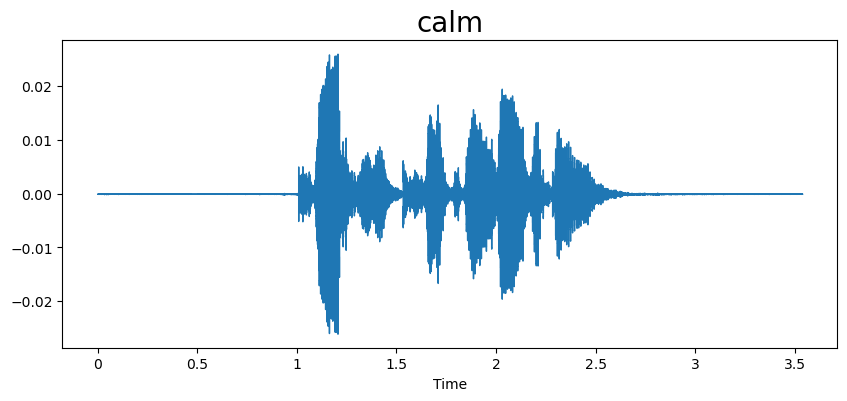

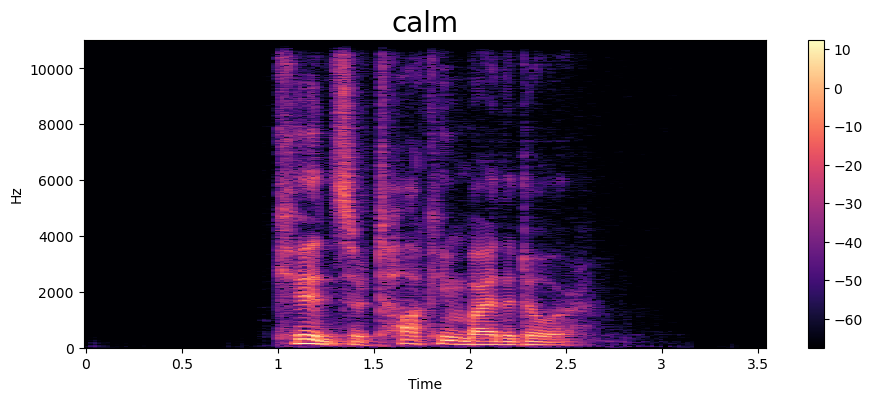

In [19]:
emotion = 'calm'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

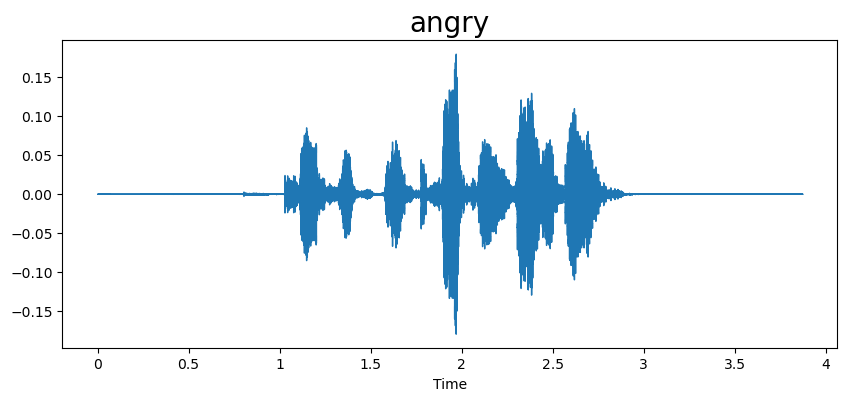

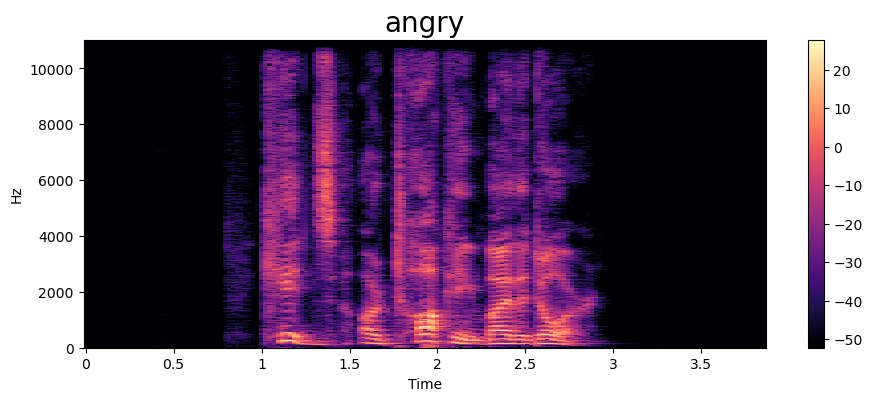

In [20]:
emotion = 'angry'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [21]:
#removing error causing data ie. calm, surprise
data_path = data_path[data_path['Emotions'] != 'calm']
data_path

Emotions                                               Path
0     neutral  C:\Users\DELL\OneDrive\Desktop\speech_project\...
1     neutral  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2     neutral  C:\Users\DELL\OneDrive\Desktop\speech_project\...
3     neutral  C:\Users\DELL\OneDrive\Desktop\speech_project\...
12      happy  C:\Users\DELL\OneDrive\Desktop\speech_project\...
...       ...                                                ...
2795      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2796      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2797      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2798      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...
2799      sad  C:\Users\DELL\OneDrive\Desktop\speech_project\...

[4048 rows x 2 columns]

<Axes: xlabel='Emotions', ylabel='count'>

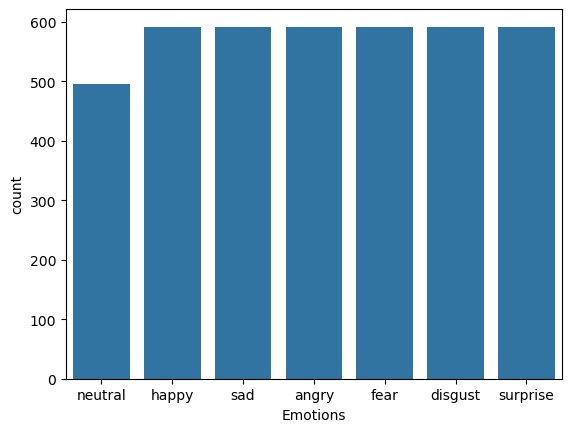

In [22]:
sns.countplot(data=data_path, x='Emotions')

In [23]:
#new dataset after removing error possibilities
data_path['Emotions'].value_counts()

happy       592
sad         592
angry       592
fear        592
disgust     592
surprise    592
neutral     496
Name: Emotions, dtype: int64

In [24]:
unique_emotions = data_path['Emotions'].unique()
print(f"Number of unique emotions : {len(unique_emotions)}")
print(unique_emotions)

Number of unique emotions : 7
['neutral' 'happy' 'sad' 'angry' 'fear' 'disgust' 'surprise']


In [25]:
data_path.Emotions.describe()

count      4048
unique        7
top       happy
freq        592
Name: Emotions, dtype: object

In [26]:
import numpy as np
import librosa

def add_noise(data):
    """
    Adds random noise to the audio signal.
    """
    noise_amp = np.random.uniform(0, 0.035) * np.max(data)
    return data + noise_amp * np.random.normal(size=data.shape)

def time_stretch(data, rate=0.8):
    """
    Stretches the audio signal in time without altering pitch.
    """
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift_audio(data):
    """
    Randomly shifts the audio signal along the time axis.
    """
    shift_range = np.random.randint(-5000, 5000)  # Shift range in samples
    return np.roll(data, shift_range)


# Example usage: Apply transformations to a sample audio file
path = np.array(data_path["Path"])[1]
data, sample_rate = librosa.load(path, sr=None)

# Apply augmentations
data_noisy = add_noise(data)
data_stretched = time_stretch(data)
data_shifted = shift_audio(data)
data_pitched = change_pitch(data, sample_rate)


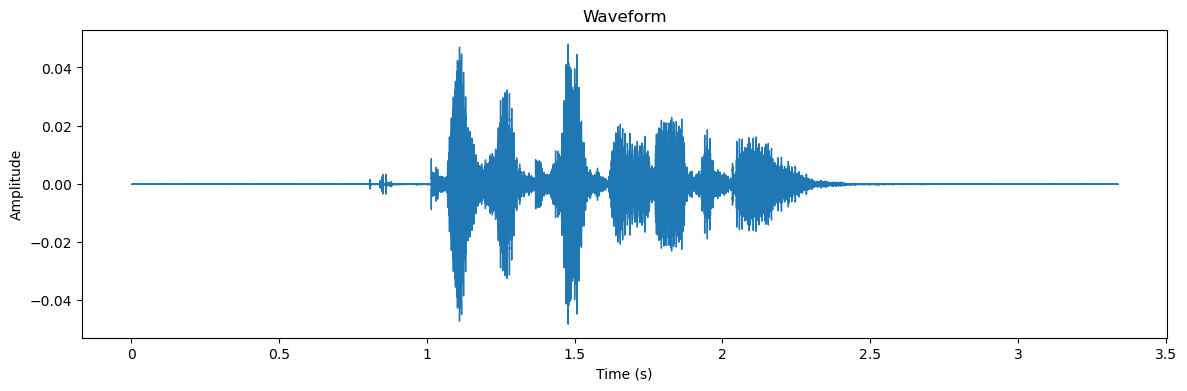

In [27]:
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio

# Plot the waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)  # Updated to waveshow (replaces deprecated waveplot)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Play the audio
Audio(data, rate=sample_rate)


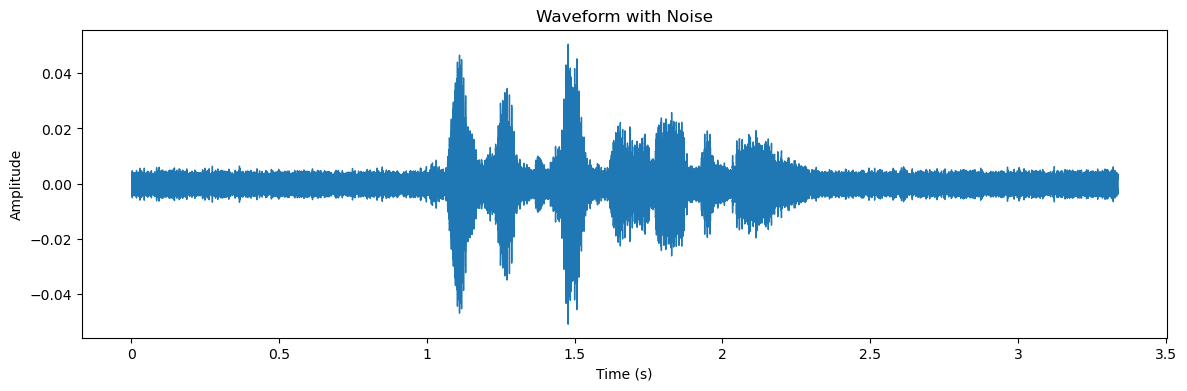

In [28]:
# Apply noise augmentation
x_noisy = add_noise(data)  # Updated function call

# Plot the waveform with noise
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x_noisy, sr=sample_rate)
plt.title("Waveform with Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Play the noisy audio
Audio(x_noisy, rate=sample_rate)


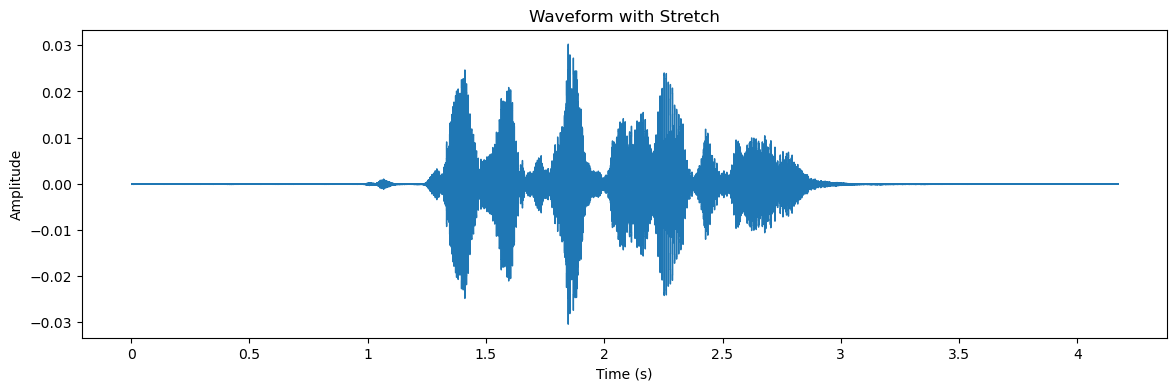

In [29]:
# Apply time stretching
x_stretched = time_stretch(data, rate=0.8)  # Updated function call

# Plot the waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x_stretched, sr=sample_rate)
plt.title("Waveform with Stretch")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Play the stretched audio
Audio(x_stretched, rate=sample_rate)


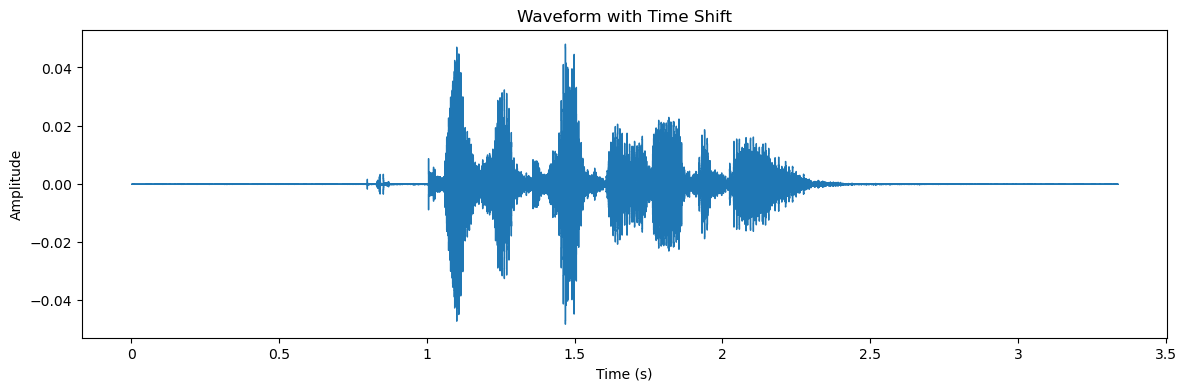

In [30]:
# Apply time shifting
x_shifted = shift_audio(data)  # Updated function call

# Plot the waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x_shifted, sr=sample_rate)
plt.title("Waveform with Time Shift")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Play the shifted audio
Audio(x_shifted, rate=sample_rate)


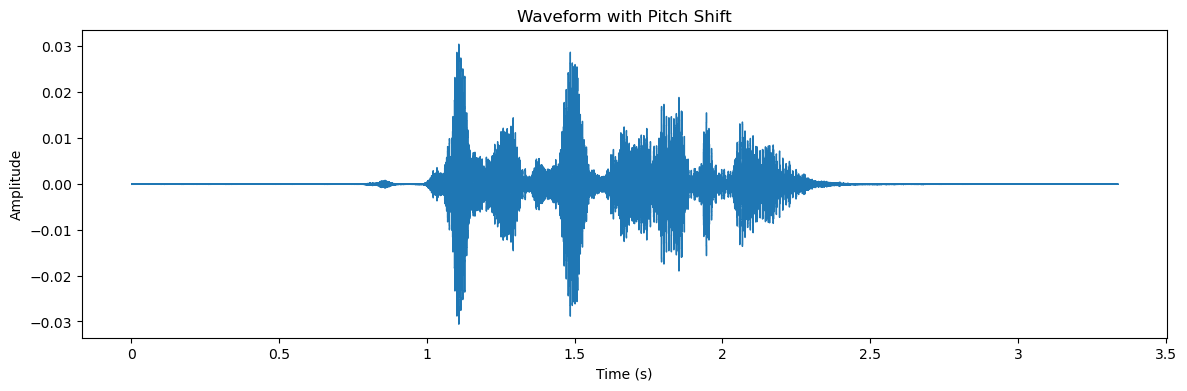

In [31]:
# Apply pitch shift
x_pitched = change_pitch(data, sample_rate)  # Updated function call

# Plot the waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x_pitched, sr=sample_rate)
plt.title("Waveform with Pitch Shift")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Play the pitch-shifted audio
Audio(x_pitched, rate=sample_rate)


In [32]:
import numpy as np
import librosa

def extract_features(data, sample_rate):
    """
    Extracts various audio features from the given waveform data.
    
    Features extracted:
    - Zero Crossing Rate (ZCR)
    - Chroma STFT
    - MFCC (Mel-Frequency Cepstral Coefficients)
    - Root Mean Square (RMS) Energy
    - Mel Spectrogram

    Returns:
        A numpy array of extracted features.
    """
    result = np.array([])

    # Zero Crossing Rate (ZCR)
    zcr = librosa.feature.zero_crossing_rate(y=data)
    zcr_mean = np.mean(zcr, axis=1)
    result = np.hstack((result, zcr_mean))

    # Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(data))

    # Chroma STFT
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
    chroma_mean = np.mean(chroma_stft, axis=1)
    result = np.hstack((result, chroma_mean))

    # MFCC (13 coefficients by default)
    mfcc = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    result = np.hstack((result, mfcc_mean))

    # Root Mean Square (RMS) Energy
    rms = librosa.feature.rms(y=data)
    rms_mean = np.mean(rms, axis=1)
    result = np.hstack((result, rms_mean))

    # Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sample_rate)
    mel_mean = np.mean(mel_spectrogram, axis=1)
    result = np.hstack((result, mel_mean))

    # Replace any NaN values (if present) with zero
    result = np.nan_to_num(result)

    return result


In [33]:
import numpy as np
import librosa

def get_features(path, duration=2.5, offset=0.6):
    """
    Extracts multiple variations of audio features from an audio file.

    Variations included:
    - Original audio
    - Noisy audio
    - Time-stretched and pitch-shifted audio

    Args:
        path (str): Path to the audio file.
        duration (float): Duration of the audio to be loaded (default: 2.5 sec).
        offset (float): Offset from the start of the audio file (default: 0.6 sec).

    Returns:
        np.ndarray: Stacked feature arrays from different augmentations.
    """
    # Load the audio file with a set duration and offset
    data, sample_rate = librosa.load(path, duration=duration, offset=offset)

    # Extract features from the original audio
    original_features = extract_features(data, sample_rate)
    result = np.array([original_features])  # Ensure correct shape for stacking

    # Extract features from audio with added noise
    noisy_data = add_noise(data)
    noisy_features = extract_features(noisy_data, sample_rate)
    result = np.vstack((result, noisy_features))

    # Extract features from time-stretched and pitch-shifted audio
    stretched_data = time_stretch(data, rate=0.8)
    pitch_shifted_data = change_pitch(stretched_data, sample_rate)
    stretched_pitch_features = extract_features(pitch_shifted_data, sample_rate)
    result = np.vstack((result, stretched_pitch_features))

    # Replace any NaN values with zero
    result = np.nan_to_num(result)

    return result


In [34]:
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tqdm import tqdm  # For progress bar

# Assume these functions are defined:
# def extract_features(audio, sr): ...
# def add_noise(audio): ...
# def time_stretch(audio, rate): ...
# def change_pitch(audio, sr): ...

# Step 1: Load dataset paths and emotions
# `data_path` should be a DataFrame with columns 'Path' and 'Emotions'
X_original, Y_original, path_list = [], [], []

print("🔄 Extracting original features from audio...")
for path, emotion in tqdm(zip(data_path.Path, data_path.Emotions), total=len(data_path), desc="Extracting Original Features"):
    audio_data, sr = librosa.load(path, duration=2.5, offset=0.6)
    feature = extract_features(audio_data, sr)
    X_original.append(feature)
    Y_original.append(emotion)
    path_list.append(path)

# Convert to NumPy arrays
X_original = np.array(X_original)
Y_original = np.array(Y_original)
path_list = np.array(path_list)

# Step 2: Split into train & test sets (before augmentation)
x_train, x_test, y_train, y_test, train_paths, test_paths = train_test_split(
    X_original, Y_original, path_list, test_size=0.2, random_state=0, shuffle=True
)

# Step 3: Apply augmentation to **raw audio** for training data only
X_train_augmented, Y_train_augmented = [], []

print("🎧 Applying audio augmentation...")
for path, emotion in tqdm(zip(train_paths, y_train), total=len(train_paths), desc="Augmenting Training Data"):
    audio_data, sr = librosa.load(path, duration=2.5, offset=0.6)

    # Original
    X_train_augmented.append(extract_features(audio_data, sr))
    Y_train_augmented.append(emotion)

    # Augmentation 1: Add noise
    noisy_audio = add_noise(audio_data)
    X_train_augmented.append(extract_features(noisy_audio, sr))
    Y_train_augmented.append(emotion)

    # Augmentation 2: Time-stretch + pitch shift
    stretched_audio = time_stretch(audio_data, rate=0.8)
    pitched_audio = change_pitch(stretched_audio, sr)
    X_train_augmented.append(extract_features(pitched_audio, sr))
    Y_train_augmented.append(emotion)

# Convert to arrays
X_train_augmented = np.array(X_train_augmented)
Y_train_augmented = np.array(Y_train_augmented)

# Step 4: One-hot encode labels
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(Y_train_augmented.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.reshape(-1, 1)).toarray()

# Step 5: Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train_augmented)
x_test_scaled = scaler.transform(x_test)

# Step 6: Reshape for Conv1D input
x_train_final = np.expand_dims(x_train_scaled, axis=2)
x_test_final = np.expand_dims(x_test_scaled, axis=2)

# Final output shapes
print("\n✅ Data Processing Complete.")
print("Train shape:", x_train_final.shape, y_train_encoded.shape)
print("Test shape:", x_test_final.shape, y_test_encoded.shape)


🔄 Extracting original features from audio...


Extracting Original Features: 100%|████████████████████████████████████████████| 4048/4048 [06:43<00:00, 10.03it/s]


🎧 Applying audio augmentation...


Augmenting Training Data: 100%|████████████████████████████████████████████████| 3238/3238 [13:42<00:00,  3.94it/s]


✅ Data Processing Complete.
Train shape: (9714, 155, 1) (9714, 7)
Test shape: (810, 155, 1) (810, 7)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, GlobalAveragePooling1D, Dense

model = Sequential()

# Block 1
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Block 2
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Block 3
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

# Global pooling to reduce overfitting and number of parameters
model.add(GlobalAveragePooling1D())

# Dense Layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=7, activation='softmax'))  # Updated to 7 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 155, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 155, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 155, 64)             │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 155, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 77, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 77, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 77, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 77, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 77, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 77, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 38, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 38, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 38, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 38, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 38, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 38, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 19, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 19, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 419,399 (1.60 MB)

 Trainable params: 417,607 (1.59 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [44]:
from keras.callbacks import ReduceLROnPlateau

# Learning rate reducer
rlrp = ReduceLROnPlateau(
    monitor='loss', 
    factor=0.4, 
    verbose=1, 
    patience=2, 
    min_lr=1e-7
)

# ✅ Use the correct encoded and preprocessed data
history = model.fit(
    x_train_final,
    y_train_encoded,
    batch_size=64,
    epochs=50,
    validation_data=(x_test_final, y_test_encoded),
    callbacks=[rlrp]
)


Epoch 1/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.3218 - loss: 1.7418 - val_accuracy: 0.1506 - val_loss: 3.4226 - learning_rate: 0.0010
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.5614 - loss: 1.1213 - val_accuracy: 0.1815 - val_loss: 3.5816 - learning_rate: 0.0010
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.6792 - loss: 0.8750 - val_accuracy: 0.5000 - val_loss: 1.6697 - learning_rate: 0.0010
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.7234 - loss: 0.7269 - val_accuracy: 0.7198 - val_loss: 0.8138 - learning_rate: 0.0010
Epoch 5/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.7538 - loss: 0.6698 - val_accuracy: 0.7568 - val_loss: 0.6158 - learning_rate: 0.0010
Epoch 6/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.7764 - loss: 0.5993 - val_accuracy: 0.7667 - val_loss: 0.5569 - learning_rate: 0.0010
Epoch 7/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.79

Epoch 44/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9499 - loss: 0.1417 - val_accuracy: 0.8716 - val_loss: 0.4852 - learning_rate: 4.0000e-04
Epoch 45/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.9547 - loss: 0.1282 - val_accuracy: 0.8704 - val_loss: 0.5114 - learning_rate: 4.0000e-04
Epoch 46/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.9625 - loss: 0.1072 - val_accuracy: 0.8815 - val_loss: 0.4973 - learning_rate: 4.0000e-04
Epoch 47/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.9655 - loss: 0.0985 - val_accuracy: 0.8778 - val_loss: 0.4957 - learning_rate: 4.0000e-04
Epoch 48/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.9663 - loss: 0.0926 - val_accuracy: 0.8815 - val_loss: 0.5095 - learning_rate: 4.0000e-04
Epoch 49/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.9652 - loss: 0.0935 - val_accuracy: 0.8765 - val_loss: 0.5217 - learning_rate: 4.0000e-04
Epoch 50/50
152/152 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip uninstall h5py -y
!pip install --no-cache-dir h5py



In [50]:
model.save("emotion_recognition_model.keras")


In [ ]:
!python -c "import h5py; print(h5py.__version__)"



In [51]:
print(y_train.shape)  # Should be (num_samples, 7)
print(y_test.shape)



(3238,)
(810,)


In [64]:
print("Train Class Distribution:")
print(pd.Series(y_train).value_counts())
print("Test Class Distribution:")
print(pd.Series(y_test).value_counts())


Train Class Distribution:
happy       484
surprise    476
fear        471
angry       471
disgust     470
sad         460
neutral     406
dtype: int64
Test Class Distribution:
sad         132
disgust     122
angry       121
fear        121
surprise    116
happy       108
neutral      90
dtype: int64


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8798 - loss: 0.5085
Accuracy of our model on test data: 87.16049194335938 %


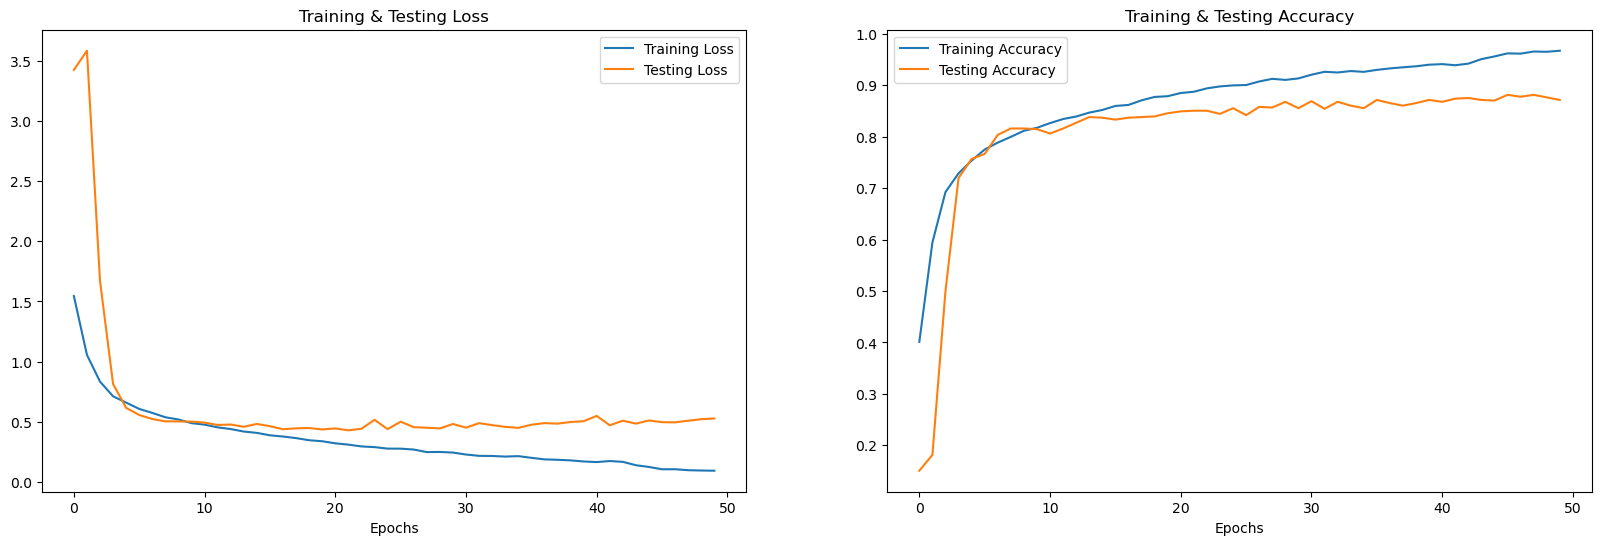

In [48]:
print("Accuracy of our model on test data:", model.evaluate(x_test_final, y_test_encoded)[1] * 100, "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [59]:
print(f"y_true shape: {y_true.shape}")
print(f"y_pred shape: {y_pred.shape}")


y_true shape: (810,)
y_pred shape: (810, 1)


In [69]:
import numpy as np
x_test_final = np.array(x_test_final)


In [71]:
print(x_test_final.shape)
print(type(x_test_final))


(810, 155, 1)
<class 'numpy.ndarray'>


In [72]:
print(model.input_shape)

(None, 155, 1)


In [76]:
print("x_test_final shape:", x_test_final.shape)


x_test_final shape: (810, 155, 1)


In [80]:
print("Model Input Shape:", model.input_shape)
print("Test Data Shape:", x_test_final.shape)


Model Input Shape: (None, 155, 1)
Test Data Shape: (810, 155, 1)


C:\Users\DELL\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step
📄 Classification Report:

              precision    recall  f1-score   support

       angry       0.92      0.91      0.92       121
     disgust       0.83      0.85      0.84       122
        fear       0.91      0.88      0.89       121
       happy       0.79      0.86      0.82       108
     neutral       0.84      0.96      0.90        90
         sad       0.89      0.83      0.85       132
    surprise       0.92      0.84      0.88       116

    accuracy                           0.87       810
   macro avg       0.87      0.87      0.87       810
weighted avg       0.87      0.87      0.87       810



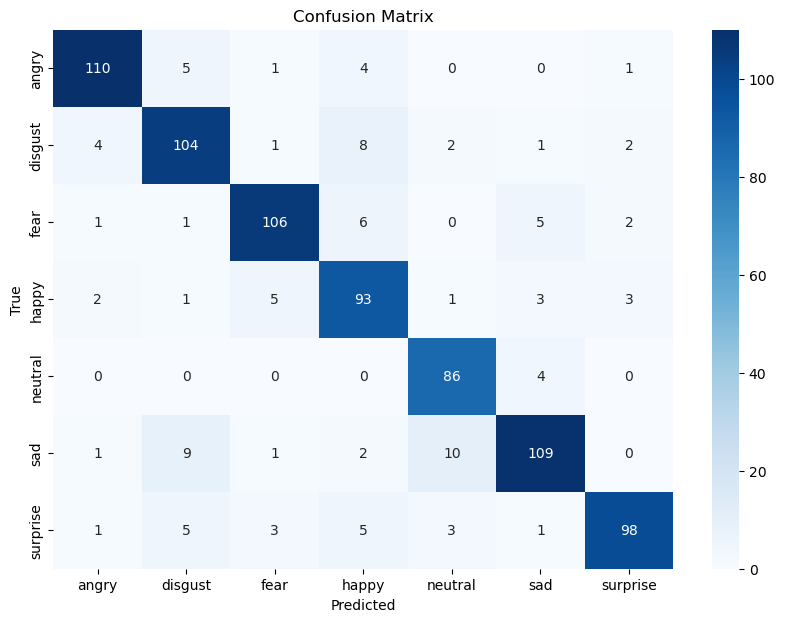

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# ✅ Just ensure eager execution is enabled (optional but safe)
tf.config.run_functions_eagerly(True)

# ✅ Explicitly cast to float32 NumPy array (for safety)
x_test_final_np = np.array(x_test_final, dtype=np.float32)

# ✅ Predict class probabilities
y_pred_probs = model.predict(x_test_final_np, verbose=1)

# ✅ Convert to class predictions
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# ✅ Print Classification Report
print("📄 Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=encoder.categories_[0]))

# ✅ Plot Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=encoder.categories_[0],
            yticklabels=encoder.categories_[0],
            cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


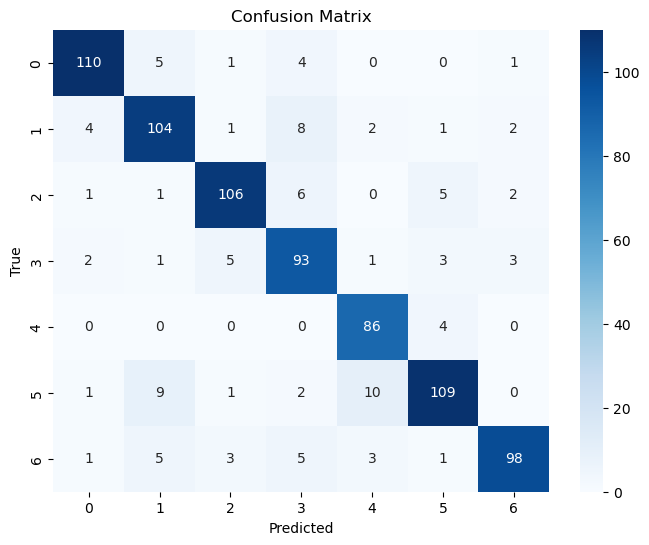

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [87]:
import pandas as pd

# Convert numeric class indices to label names
predicted_labels = [encoder.categories_[0][i] for i in y_pred_classes]
actual_labels = [encoder.categories_[0][i] for i in y_true_classes]

# Create the DataFrame
df = pd.DataFrame({
    'Predicted Labels': predicted_labels,
    'Actual Labels': actual_labels
})

# Display the first 10 rows
df.head(10)


Predicted Labels Actual Labels
0            angry         angry
1          disgust       disgust
2            angry         angry
3          neutral       neutral
4             fear          fear
5            angry         angry
6             fear          fear
7            angry         angry
8              sad           sad
9              sad           sad

In [120]:
print(x_train.shape)
print(x_test.shape)


(3238, 155, 1)
(810, 155, 1)


In [103]:
pip install shap


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
